In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from postgresql import postkey

In [2]:
#Create Engine
path = "postgresql://" + postkey + "/sql_hw_db"

engine = create_engine(path)
conn = engine.connect()

In [3]:
#Query All Records in the Database
data_employees_df = pd.read_sql("SELECT * FROM data_employees", conn)
data_salaries_df = pd.read_sql("SELECT * FROM data_salaries", conn)
data_titles_df = pd.read_sql("SELECT * FROM data_titles", conn)
departments_df = pd.read_sql("SELECT * FROM departments", conn)
dept_emp_df = pd.read_sql("SELECT * FROM dept_emp", conn)
dept_manager_df = pd.read_sql("SELECT * FROM dept_manager", conn)

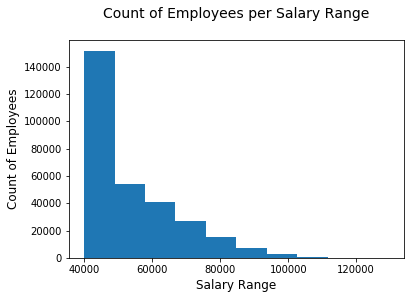

In [4]:
#Create Histogram for Count of Employees per Salary Range
plt.hist(data_salaries_df["salary"])
plt.title("Count of Employees per Salary Range\n", size=14)
plt.xlabel("Salary Range", size=12)
plt.ylabel("Count of Employees", size=12)
plt.show()

In [5]:
#Merge titles and salaries dataframes on employee number
titles_salaries_df = pd.merge(data_titles_df, data_salaries_df, on="emp_no", how="outer")
titles_salaries_df.head()

,emp_no,title,from_date_x,to_date_x,id,salary,from_date_y,to_date_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,1,60117,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,9999-01-01,2,65828,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,9999-01-01,3,40006,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01,4,40054,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,5,40054,1986-12-01,1987-12-01


In [6]:
#Calculate the average salary per job title
avg_salaries = titles_salaries_df.groupby("title")["salary"]
avg_salaries_mean = avg_salaries.mean()
avg_salaries_mean_df = pd.DataFrame({"Average Salary": avg_salaries_mean}).sort_values(by="Average Salary", ascending=True)
avg_salaries_mean_df

,Average Salary
title,
Assistant Engineer,48493.204786
Senior Engineer,48506.751806
Engineer,48539.781423
Technique Leader,48580.505772
Manager,51531.041667
Staff,58465.271904
Senior Staff,58503.286614


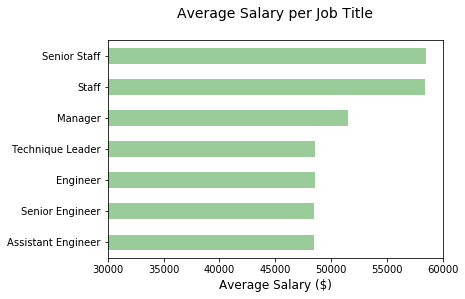

In [7]:
#Create Barchart for Average Salary per job Title
avg_salaries_mean_df.plot(y="Average Salary", kind="barh", alpha=0.4, facecolor="green", legend=False)
plt.title("Average Salary per Job Title\n", size=14)
plt.xlabel("Average Salary ($)", size=12)
plt.xlim(30000,60000)
plt.ylabel("")
plt.show()